# Some example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import Tensor, nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

In [2]:
def get_batch(size=20, max_val=100):
    x = np.random.randint(1, max_val, [10, size]) # input
    y = np.random.randint(1, 9, size) # index
    for i, v in enumerate(y):
        x[9, i] = x[v, i] # task: predict what index have x[10]
    x = np.vstack([np.array(range(10)).reshape([-1, 1]) * np.ones_like(x), x])
    return Variable(Tensor(x.T)), Variable(Tensor(y))
    
get_batch(4)[0].shape   

torch.Size([4, 20])

In [ ]:
def get_batch3(size=20, max_val=500):
    x = np.random.randint(1, max_val, [10, size]) # input
    y = np.random.randint(0, 9, [size, 2]) # index
    for i, v in enumerate(y):
        if v[0] != v[1]:
            x[v[0], i] = x[v[1], i] # task: predict what index have x[10]
            
        elif v[0] < 9:
            x[v[0], i] = x[9, i]
            y[i,1] = 9
    #x = np.vstack([np.array(range(10)).reshape([-1, 1]) * np.ones_like(x), x])
    return Variable(Tensor(x.T)), Variable(Tensor(y))
    
get_batch3(4)#[0].shape   

In [ ]:
def get_batch_rnn2(size):
    x, y = get_batch3(size)
    return x.view([10,size,1]), y

get_batch_rnn2(2)

In [ ]:
def get_batch_rnn(size=20, max_val=100):
    x = np.random.randint(1, max_val, [10, size])
    y = np.random.randint(1, 9, size)
    z = np.zeros([10, size, 2])
    for l in range(10):
        for i in range(size):
            z[l, i, 0] = l
            z[l, i, 1] = x[l, i]
    for i, v in enumerate(y):
        z[9,i,0] = x[v, i]
        z[9,i,1] = x[v, i]
    return Variable(Tensor(z)), Variable(Tensor(y))
get_batch_rnn(1)

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim=1, hidden_dim=32, tagset_size=2):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        
        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden = nn.Linear(hidden_dim, 100)
        self.hidden2tag = nn.Linear(100, tagset_size)

    def forward(self, sentence):
        lstm_out, _ = self.lstm(sentence)
        tag_space = self.hidden2tag(F.relu(self.hidden(_[-1])))
        #tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_space

In [ ]:
net = nn.Sequential(nn.Linear(10, 132), nn.ReLU(), nn.Linear(132, 32), nn.ReLU(), nn.Linear(32, 2))
nnet = LSTMTagger()#nn.Sequential(nn.RNN(2, 12))
#net2 = nn.Sequential(nnet, nn.ReLU(), nn.Linear(12, 32), nn.ReLU(), nn.Linear(32, 1))
#import torch.optim as optim

#criterion = lambda x, y: ((x[0] - y[0]) - (x[1] - y[1]))**2#nn.MSELoss()#nn.CrossEntropyLoss()


optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

loss_back = []

In [ ]:
criterion(get_batch_rnn2(3)[1], get_batch_rnn2(3)[1])

In [ ]:

for i in range(1000):
    optimizer.zero_grad()
    # x, y = get_batch3(24)
    # pry = net(x)
    x, y = get_batch_rnn2(4)
    
    pry = nnet(x)
    #print((pry[0][:,0] - y[:,0]))
    loss = torch.sum(torch.sqrt(((pry[0][:,0] - y[:,0]) + (pry[0][:,1] - y[:,1]))**2))
    #print(loss)
    if i%10 ==0:
        loss_back.append(loss)
    loss.backward()
    optimizer.step()
    

In [ ]:
plt.plot(loss_back)
plt.show()

In [ ]:

tr = []
pr = []
for i in range(30):
    #x, y, net(x)
    x, y = get_batch3(1)
    tr.append(y.data.numpy()[0])
    pr.append(net(x).data.numpy()[0])
    
print(tr)
plt.scatter(range(len(tr)), tr)
plt.scatter(range(len(tr)), pr)
plt.show()

# if array of 2 or 3 digits has equal?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import Tensor, nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

In [4]:
def get_batch(size, count_n=2):
    x = np.random.randint(0, 30, [size, 2]) / 30
    y = np.zeros_like(x)
    for i, v in enumerate(x):
        if np.random.rand() > 0.5:
            v[1] = v[0]
            #x[i] = v 
        #print(v)
        y[i] = [0, 1]
        if len(set(v)) < count_n:
            y[i] = [1, 0]
    return Variable(Tensor(x)), Variable(torch.LongTensor(y[:,0]))#.view([1,-1])

get_batch(5)
    

(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.5000, 0.8667],
         [0.6667, 0.6667],
         [0.8667, 0.5333]]), tensor([1, 1, 0, 1, 0]))

In [ ]:
torch.empty(3, dtype=torch.long).random_(5)

In [30]:
#net = nn.Sequential(nn.Linear(2, 4), nn.Linear(4, 2), nn.Softmax())
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

loss_back = []

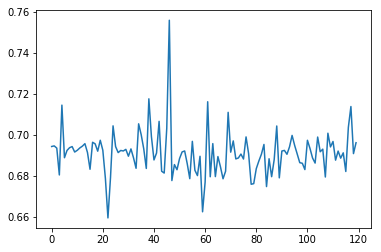

In [36]:
for i in range(200):
    optimizer.zero_grad()
    # x, y = get_batch3(24)
    # pry = net(x)
    x, y = get_batch(10)
    
    pry = net(x)
    #print((pry[:,0], y))
    loss = criterion(pry, y)
    #print(loss)
    if i%10 ==0:
        loss_back.append(loss)
    loss.backward()
    optimizer.step()
    
#print(net.l1.weight)
plt.plot(loss_back)
plt.show()

In [ ]:
#net = nn.Sequential(nn.Linear(2, 1), nn.Tanh(), nn.Linear(4, 2), nn.Softmax())

In [ ]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.l1 = nn.Linear(2,100)
        self.t1 = nn.Tanh()
        self.l2 = nn.Linear(100, 200)
        self.l3 = nn.Linear(200,2)
        
    def forward(self, x, pr=0):
        #x = Variable(Tensor(x))
        if pr: print('1  ', x)
        x = self.l1(x)
        x = self.t1(x)
        #if pr: print('2  ', x)
        x = F.tanh(self.l2(x))
        #if pr: print('3  ', x)
        x = F.softmax(self.l3(x))
        if pr: print('4  ', x)
        return x
    
net = NN()
#optimizer.zero_grad()
#py = net([3,3])
#loss = py - 1
#print(net.l1.weight, loss, py)
#loss.backward()

In [ ]:
x, y = get_batch(3)
net(x, 1)

### Another classifier

In [ ]:
#input = torch.randn(20, 16, 5)
#input

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 5, 2)
        self.pool = nn.MaxPool1d(2)
        #self.conv2 = nn.Conv1d(6, 2, 5)
        self.fc1 = nn.Linear(5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = x.view(-1,1,2)
        x = self.pool(F.relu(self.conv1(x)))
        #x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net(get_batch(3)[0])#torch.randn(2, 1, 2))#get_batch(3)[0])

tensor([[0.1473, 0.1233],
        [0.1162, 0.1050],
        [0.1436, 0.1162]], grad_fn=<AddmmBackward>)

In [ ]:
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

In [ ]:
#optimizer.step()
print(net.l1.weight)

In [ ]:
print(net.l1.weight)

# From minus get plus

In [ ]:
def get_batch(size, count_n=2):
    x = np.random.randint(-20, 20, [size, 1])
    y = np.abs(x)#np.zeros_like(x)
    return Variable(Tensor(x)), Variable(Tensor(y))#.view([1,-1])

get_batch(5)

In [ ]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.l1 = nn.Linear(1,2)
        self.t1 = nn.Tanh()
        self.l2 = nn.Linear(2, 1)
        #self.l3 = nn.Linear(1,2)
        
    def forward(self, x, pr=0):
        #x = Variable(Tensor(x))
        if pr: print('1  ', x)
        x = self.l1(x)
        x = self.t1(x)
        if pr: print('2  ', x)
        x = F.relu(self.l2(x))
        if pr: print('3  ', x)
        #x = F.softmax(self.l3(x))
        #if pr: print('4  ', x)
        return x
    
net = NN()

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

loss_back = []

In [ ]:
for i in range(200):
    optimizer.zero_grad()
    # x, y = get_batch3(24)
    # pry = net(x)
    x, y = get_batch(10)
    
    pry = net(x)
    #print((pry[:,0], y))
    loss = criterion(pry, y)
    #print(loss)
    if i%10 ==0:
        loss_back.append(loss)
    loss.backward()
    optimizer.step()
    
print(net.l1.weight)
plt.plot(loss_back)
plt.show()

# Evolution Strategy Deep Neuroevolution

In [37]:
"""
A bare bones examples of optimizing a black-box function (f) using
Natural Evolution Strategies (NES), where the parameter distribution is a 
gaussian of fixed standard deviation.
"""

import numpy as np
np.random.seed(0)

# the function we want to optimize
def f(w):
  # here we would normally:
  # ... 1) create a neural network with weights w
  # ... 2) run the neural network on the environment for some time
  # ... 3) sum up and return the total reward

  # but for the purposes of an example, lets try to minimize
  # the L2 distance to a specific solution vector. So the highest reward
  # we can achieve is 0, when the vector w is exactly equal to solution
  reward = -np.sum(np.square(solution - w))
  return reward

# hyperparameters
npop = 50 # population size
sigma = 0.1 # noise standard deviation
alpha = 0.001 # learning rate

# start the optimization
solution = np.array([0.5, 0.1, -0.3])
w = np.random.randn(3) # our initial guess is random
for i in range(300):

  # print current fitness of the most likely parameter setting
  if i % 20 == 0:
    print('iter %d. w: %s, solution: %s, reward: %f' % 
          (i, str(w), str(solution), f(w)))

  # initialize memory for a population of w's, and their rewards
  N = np.random.randn(npop, 3) # samples from a normal distribution N(0,1)
  R = np.zeros(npop)
  for j in range(npop):
    w_try = w + sigma*N[j] # jitter w using gaussian of sigma 0.1
    R[j] = f(w_try) # evaluate the jittered version

  # standardize the rewards to have a gaussian distribution
  A = (R - np.mean(R)) / np.std(R)
  # perform the parameter update. The matrix multiply below
  # is just an efficient way to sum up all the rows of the noise matrix N,
  # where each row N[j] is weighted by A[j]
  w = w + alpha/(npop*sigma) * np.dot(N.T, A)

iter 0. w: [1.76405235 0.40015721 0.97873798], solution: [ 0.5  0.1 -0.3], reward: -3.323094
iter 20. w: [1.63796944 0.36987244 0.84497941], solution: [ 0.5  0.1 -0.3], reward: -2.678783
iter 40. w: [1.50042904 0.33577052 0.70329169], solution: [ 0.5  0.1 -0.3], reward: -2.063040
iter 60. w: [1.36438269 0.29247833 0.56990397], solution: [ 0.5  0.1 -0.3], reward: -1.540938
iter 80. w: [1.2257328  0.25622233 0.43607161], solution: [ 0.5  0.1 -0.3], reward: -1.092895
iter 100. w: [1.08819889 0.22827364 0.30415088], solution: [ 0.5  0.1 -0.3], reward: -0.727430
iter 120. w: [0.95675286 0.19282042 0.16682465], solution: [ 0.5  0.1 -0.3], reward: -0.435164
iter 140. w: [0.82214521 0.16161165 0.03600742], solution: [ 0.5  0.1 -0.3], reward: -0.220475
iter 160. w: [ 0.70282088  0.12935569 -0.09779598], solution: [ 0.5  0.1 -0.3], reward: -0.082885
iter 180. w: [ 0.58380424  0.11579811 -0.21083135], solution: [ 0.5  0.1 -0.3], reward: -0.015224
iter 200. w: [ 0.52089064  0.09897718 -0.2761225 ]